In [0]:
import numpy as np 
import pandas as pd 
import zipfile
import matplotlib.colors as colors
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from google.colab import files
pd.options.display.max_rows = 373
pd.options.display.max_columns = 4000

In [0]:
zf= zipfile.ZipFile('data.zip','r')
zf.extractall()


In [4]:
cd data


/content/data


In [5]:
!ls

data_description.txt   sample_submission.csv.gz  test.csv.gz  train.csv.gz
sample_submission.csv  test.csv			 train.csv


In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df=train_df.T.drop_duplicates().T
test_df=test_df.T.drop_duplicates().T
train_df= train_df.fillna(12345678)
test_df= test_df.fillna(12345678)


### Sorting the acutal object columns from the integer columns

In [0]:
label_encode = []
for col in train_df:
  if train_df[col].dtype=='object':
    try:
      train_df[col].to_numeric(inplace=True)
      continue
    except:
      train_df[col].replace(12345678, "NAN",inplace=True)       
      
for col in test_df:
  if test_df[col].dtype=='object':
    try:
      test_df[col].to_numeric(inplace=True)
      continue
    except:
      test_df[col].replace(12345678, "NAN",inplace=True)
 

### Encoding


In [0]:
to_one_hot = [
"MSZoning"
,"MSSubClass"
,"LandContour"
,"LotConfig"
,"Neighborhood"
,"BldgType"
,"HouseStyle"
,"RoofStyle"
,"MasVnrType"                
,"Foundation"
,"Heating"
,"Electrical"
,"GarageType"
,"SaleType"
,"SaleCondition",
"MiscFeature", "RoofMatl"]



no_encoding=[
    "SalePrice",
    "Exterior1st",
    "Exterior2nd",
"Condition1", 
"Condition2",  
"LotFrontage"
    ,"YearBuilt"
    ,"YearRemodAdd"
,"LotArea"          
,"BedroomAbvGr"
,"KitchenAbvGr"
,"MasVnrArea"
,"OverallQual"
,"OverallCond"
,"BsmtFinSF1"
,"BsmtFinSF2"
,"BsmtUnfSF"
,"TotalBsmtSF"
,"1stFlrSF"
,"2ndFlrSF"
,"LowQualFinSF"
,"GrLivArea"
,"BsmtFullBath"
,"BsmtHalfBath"
,"FullBath"
,"HalfBath"
,"TotRmsAbvGrd"
,"Fireplaces"
,"GarageYrBlt"
,"GarageCars"
,"GarageArea"
,"WoodDeckSF"
,"OpenPorchSF"
,"EnclosedPorch"
,"3SsnPorch"
,"ScreenPorch"
,"PoolArea"
,"MiscVal"
,"MoSold"
,"YrSold","LotShape"]

for col in train_df: 
  if col in no_encoding:
    train_df[col].replace(12345678, np.nan,inplace=True)
    if(col != 'SalePrice'):
      test_df[col].replace(12345678, np.nan,inplace=True)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


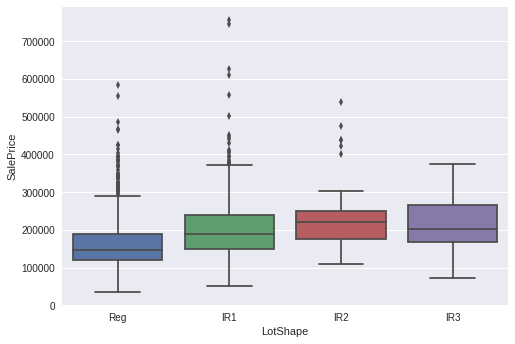

In [9]:
sns.boxplot(train_df['LotShape'],train_df['SalePrice'])

### Whether the lotshape is regular or not affects the saleprice, but the degree to which a lotshape is irregular doesn't seem to affect the saleprice (i.e. the more irregular doesn't imply a higher saleprice)

Map all kinds of irregulars to one irregular value

In [0]:
train_df['LotShape'].replace(["Reg"],0,inplace=True)
train_df['LotShape'].replace(["IR1", "IR2","IR3"],1,inplace=True)

test_df['LotShape'].replace(["Reg"],0,inplace=True)
test_df['LotShape'].replace(["IR1", "IR2","IR3"],1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


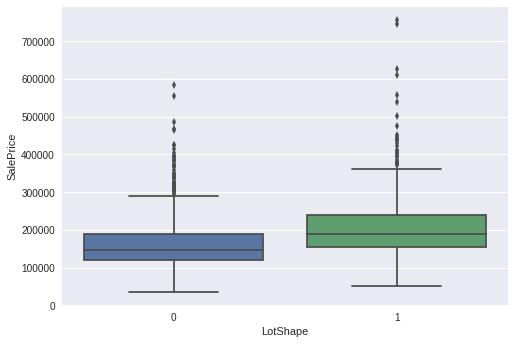

In [11]:
sns.boxplot(train_df['LotShape'],train_df['SalePrice'])

## Label encoding

In [0]:
columns = ["Utilities",
           "LandSlope",
           "ExterQual", 
           "ExterCond", 
           "BsmtQual",
           "BsmtCond", 
           "BsmtExposure",
           "Street",
           "Alley",
           "HeatingQC",
           "CentralAir",
           "KitchenQual",  
           "Functional", 
           "FireplaceQu", 
           "GarageFinish",
           "GarageQual", 
           "GarageCond", 
           "PavedDrive", 
           "PoolQC",                
           
           ##Additional
           "Fence",
           "BsmtFinType1",
           "BsmtFinType2"          
          ]

column_values = [["NAN", "ELO","NoSeWa", "NoSewr", "AllPub"], 
                 ["NAN", "Sev","Mod", "Gtl"],
                 ["NAN","Po", "Fa", "TA", "Gd", "Ex"],
                 ["NAN","Po", "Fa", "TA", "Gd", "Ex"],
                 ["NAN", "Po", "Fa", "TA", "Gd", "Ex"],
                 ["NAN", "Po", "Fa", "TA", "Gd", "Ex"], 
                 ["NAN", "No", "Mn", "Av", "Gd"], 
                 ["NAN", "Grvl", "Pave"],
                 ["NAN", "Grvl", "Pave"],
                 ["NAN","Po", "Fa", "TA", "Gd", "Ex"], 
                 ["NAN","N","Y"],
                 ["NAN","Po", "Fa", "TA", "Gd", "Ex"],
                 ["NAN","Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ" ],
                 ["NAN", "Po", "Fa", "TA", "Gd", "Ex"], 
                 ["NAN", "Unf", "RFn", "Fin"], 
                 ["NAN", "Po", "Fa", "TA", "Gd", "Ex"],
                 ["NAN", "Po", "Fa", "TA", "Gd", "Ex"], 
                 ["NAN","N","P","Y"],
                 ["NAN", "Fa", "TA", "Gd", "Ex"],
                             
                 ##Additional
                 ["NAN", "MnWw", "MnPrv", "GdWo", "GdPrv"],
                 [ "NAN", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
                 [ "NAN", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
                 ]  





In [0]:
#Older encoder. Does not account for intersection between test and train
# le = LabelEncoder()
# for column in range(len(columns)):
#   le.fit(column_values[column])
#   train_df[columns[column]] = le.transform(train_df[columns[column]])
#   test_df[columns[column]] = le.transform(test_df[columns[column]])

In [0]:
for column in range(len(columns)):  
  in_both = [x for x in list(train_df[columns[column]].unique()) if x in list(test_df[columns[column]].unique())]
  in_order = [x for x in column_values[column] if x in in_both]
  if 'NAN' not in in_order:
    in_order=['NAN'] + in_order
  
  label_mapping = {in_order[i]:i for i in range(len(in_order))}
  
  for c in [x for x in list(train_df[columns[column]].unique())]:
    if c not in in_both:
      train_df[columns[column]]=train_df[columns[column]].replace(c,'NAN')
  for c in [x for x in list(test_df[columns[column]].unique())]:
    if c not in in_both:
      test_df[columns[column]]=test_df[columns[column]].replace(c,'NAN')    
  
  train_df[columns[column]] = train_df[columns[column]].map(label_mapping)
  test_df[columns[column]] = test_df[columns[column]].map(label_mapping) 

## Replace NaN values by the median values for each column

In [0]:


median_LotFrontage=np.median(train_df['LotFrontage'].dropna())
train_df['LotFrontage']=train_df['LotFrontage'].fillna(median_LotFrontage)

median_MasVnrArea=np.median(train_df['MasVnrArea'].dropna())
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(median_MasVnrArea)

median_GarageYrBlt=np.median(train_df['GarageYrBlt'].dropna())
train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna(median_GarageYrBlt)

median_LotFrontage=np.median(test_df['LotFrontage'].dropna())
test_df['LotFrontage']=test_df['LotFrontage'].fillna(median_LotFrontage)

median_MasVnrArea=np.median(test_df['MasVnrArea'].dropna())
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(median_MasVnrArea)

median_GarageYrBlt=np.median(test_df['GarageYrBlt'].dropna())
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(median_GarageYrBlt)

median=np.median(test_df['BsmtFinSF1'].dropna())
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(median)

median=np.median(test_df['BsmtFinSF2'].dropna())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(median)

median=np.median(test_df['BsmtUnfSF'].dropna())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(median)

median=np.median(test_df['TotalBsmtSF'].dropna())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(median)

median=np.median(test_df['BsmtFullBath'].dropna())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(median)

median=np.median(test_df['BsmtHalfBath'].dropna())
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(median)

median=np.median(test_df['GarageCars'].dropna())
test_df['GarageCars']=test_df['GarageCars'].fillna(median)

median=np.median(test_df['GarageArea'].dropna())
test_df['GarageArea']=test_df['GarageArea'].fillna(median)

train_df['MiscFeature'].replace('NAN','NoMiscFeature',inplace=True)
test_df['MiscFeature'].replace('NAN','NoMiscFeature',inplace=True)

train_df['MiscFeature'].replace('Shed','MiscShed',inplace=True)
test_df['MiscFeature'].replace('Shed','MiscShed',inplace=True)

train_df['MasVnrType'].replace('Stone','MasStone',inplace=True)
test_df['MasVnrType'].replace('Stone','MasStone',inplace=True)


train_df['MasVnrType'].replace('NAN','MasNAN',inplace=True)
test_df['MasVnrType'].replace('NAN','MasNAN',inplace=True)

train_df['GarageType'].replace('NAN','GarageNAN',inplace=True)
test_df['GarageType'].replace('NAN','GarageNAN',inplace=True)

train_df['Electrical'].replace('NAN','ElectricalNAN',inplace=True)
test_df['Electrical'].replace('NAN','ElectricalNAN',inplace=True)

In [16]:
#verifying that have no more nans

nans = train_df.isna().any()
nans2=train_df.columns[(train_df == "NAN").iloc[0]]
print(train_df.columns[nans.values])
print(nans2)

nans = test_df.isna().any()
nans2=test_df.columns[(test_df == "NAN").iloc[0]]
print(test_df.columns[nans.values])
print(nans2)

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


## One hot encoding

In [17]:
pd_concat1=pd.concat([train_df[col] for col in to_one_hot], axis=1, keys=to_one_hot)
pd_concat2=pd.concat([test_df[col] for col in to_one_hot], axis=1, keys=to_one_hot)

pd_concat=pd.concat((pd_concat1,pd_concat2),axis=0)

one_hot_encoded_all=pd.concat([pd.get_dummies(pd_concat[col])for col in list(pd_concat.columns)], axis=1)
one_hot_encoded_train = one_hot_encoded_all.iloc[:len(train_df)]
one_hot_encoded_test = one_hot_encoded_all.iloc[len(train_df):]


train_df = pd.concat([train_df.loc[:,no_encoding], one_hot_encoded_train,train_df.loc[:,columns]], axis=1)
test_df = pd.concat([test_df.loc[:,no_encoding], one_hot_encoded_test,test_df.loc[:,columns]], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


## One-hot encoding might result in different columns having the same name. Specifically NaN, change them to something different.

In [0]:


nulls=np.where(train_df.columns.get_loc('NAN'))

train_df['NAN1']=train_df['NAN'].iloc[:,0]
train_df['NAN2']=train_df['NAN'].iloc[:,1]

train_df.drop(columns=['NAN'],inplace=True)

test_df['NAN1']=test_df['NAN'].iloc[:,0]
test_df['NAN2']=test_df['NAN'].iloc[:,1]

test_df.drop(columns=['NAN'],inplace=True)



In [0]:
#Remove the saleprice leakage to the test data
test_df.drop(columns=['SalePrice'],inplace=True) 

In [20]:
#verifying that have no more nans

nans = train_df.isna().any()
nans2=train_df.columns[(train_df == "NAN").iloc[0]]
print(train_df.columns[nans.values])
print(nans2)

nans = test_df.isna().any()
nans2=test_df.columns[(test_df == "NAN").iloc[0]]
print(test_df.columns[nans.values])

print(nans2)

print(len(train_df.columns))
print(len(test_df.columns))

train_df = train_df.loc[:,~train_df.columns.duplicated()]

test_df = test_df.loc[:,~test_df.columns.duplicated()]



print(len(train_df.columns))
print(len(test_df.columns))



Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
197
196
197
196


## Condition1 and Condition2 are semantically related columns, we manually one hot encode them by taking the intersection between both.

In [21]:
one_hot_encoded_train2 = pd.concat([pd.get_dummies(train_df[col])for col in ["Condition1", "Condition2"]], axis=1, keys=["Condition1", "Condition2"])
one_hot_encoded_test2 = pd.concat([pd.get_dummies(test_df[col])for col in ["Condition1", "Condition2"]], axis=1, keys=["Condition1", "Condition2"])


mutual_cols_train = ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN','RRAe', 'RRAn','RRNn'] 
extra_cols_train = ['RRNe'] 

mutual_cols_test =  ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN'] 
extra_cols_test = ['RRAe', 'RRAn','RRNn', 'RRNe'] 


one_hot_encoded_train3 = pd.DataFrame()
one_hot_encoded_test3 = pd.DataFrame()

for col in mutual_cols_train:
  one_hot_encoded_train3[col] = one_hot_encoded_train2["Condition1"][col]+one_hot_encoded_train2["Condition2"][col]

for col in extra_cols_train:
  one_hot_encoded_train3[col] = one_hot_encoded_train2["Condition1"][col]

for col in mutual_cols_test:
  one_hot_encoded_test3[col] = one_hot_encoded_test2["Condition1"][col]+one_hot_encoded_test2["Condition2"][col]
 
for col in extra_cols_test:
   one_hot_encoded_test3[col] = one_hot_encoded_test2["Condition1"][col]


print(len(train_df.columns))
print(len(test_df.columns))



197
196


In [22]:

train_df.drop(columns=['Condition1'],inplace=True)
train_df.drop(columns=['Condition2'],inplace=True)


test_df.drop(columns=['Condition1'],inplace=True)
test_df.drop(columns=['Condition2'],inplace=True)


train_df=pd.concat((train_df,one_hot_encoded_train3),axis=1)
test_df=pd.concat((test_df,one_hot_encoded_test3),axis=1)


print(len(train_df.columns))
print(len(test_df.columns))



204
203


## Same manual procedure for Exterior1st and 2nd

In [23]:
train_df["Exterior2nd"] =train_df["Exterior2nd"].replace("Wd Shng", "WdShing")
train_df["Exterior2nd"] = train_df["Exterior2nd"].replace("Brk Cmn", "BrkComm")
train_df["Exterior2nd"] = train_df["Exterior2nd"].replace("CmentBd", "CemntBd")

test_df["Exterior2nd"] = test_df["Exterior2nd"].replace("Wd Shng", "WdShing")
test_df["Exterior2nd"] = test_df["Exterior2nd"].replace("Brk Cmn", "BrkComm")
test_df["Exterior2nd"] = test_df["Exterior2nd"].replace("CmentBd", "CemntBd")

one_hot_encoded_traint2 = pd.concat([pd.get_dummies(train_df[col])for col in ["Exterior1st", "Exterior2nd"]], axis=1, keys=["Exterior1st", "Exterior2nd"])
one_hot_encoded_testt2 = pd.concat([pd.get_dummies(test_df[col])for col in ["Exterior1st", "Exterior2nd"]], axis=1, keys=["Exterior1st", "Exterior2nd"])

mutual_cols_train = ["WdShing", "BrkComm" ,"VinylSd"   
,"HdBoard"    
,"MetalSd"    
,"Wd Sdng"    
,"Plywood"    
,"CemntBd"     
,"BrkFace"       
,"Stucco"      
,"AsbShng"          
,"Stone"        
,"ImStucc"      
,"AsphShn"      
,"CBlock"] 
 #columns in 1 and 2

mutual_cols_test =  ["WdShing", "BrkComm" ,"VinylSd"   
,"HdBoard"    
,"MetalSd"    
,"Wd Sdng"    
,"Plywood"    
,"CemntBd"     
,"BrkFace"       
,"Stucco"      
,"AsbShng"     
,"AsphShn"      
,"CBlock"]  
extra_cols_test = ["ImStucc", "Stone"] #columns only in 2

one_hot_encoded_traint3 = pd.DataFrame()
one_hot_encoded_testt3 = pd.DataFrame()

for col in mutual_cols_train:
  one_hot_encoded_traint3[col] = one_hot_encoded_traint2["Exterior1st"][col]+one_hot_encoded_traint2["Exterior2nd"][col]

for col in mutual_cols_test:
  one_hot_encoded_testt3[col] = one_hot_encoded_testt2["Exterior1st"][col]+one_hot_encoded_testt2["Exterior2nd"][col]
 
for col in extra_cols_test:
   one_hot_encoded_testt3[col] = one_hot_encoded_testt2["Exterior2nd"][col]

    
    
train_df = train_df.loc[:,~train_df.columns.duplicated()]

test_df = test_df.loc[:,~test_df.columns.duplicated()]



print(len(train_df.columns))
print(len(test_df.columns))


204
203


In [0]:
train_df.drop(columns=['Exterior1st'],inplace=True)
train_df.drop(columns=['Exterior2nd'],inplace=True)


test_df.drop(columns=['Exterior1st'],inplace=True)
test_df.drop(columns=['Exterior2nd'],inplace=True)


In [25]:
train_df=pd.concat((train_df,one_hot_encoded_traint3),axis=1)
test_df=pd.concat((test_df,one_hot_encoded_testt3),axis=1)

traincol = train_df.columns.values.tolist()
testcol = test_df.columns.values.tolist()

print(np.setdiff1d(traincol, testcol))
print(len(traincol))
print(len(testcol))


#Remove the extra duplicate columns that come from ext1st and 2nd
train_df = train_df.loc[:,~train_df.columns.duplicated()]
test_df = test_df.loc[:,~test_df.columns.duplicated()]

print(len(train_df.columns))
print(len(test_df.columns))

['SalePrice']
217
216
214
213


In [0]:
#Transform the cells to float since the duplicate dropping makes them into objects
train_df = train_df.loc[:,~train_df.columns.duplicated()]

test_df = test_df.loc[:,~test_df.columns.duplicated()]

for col in train_df.columns:
  train_df[col]=train_df[col].astype(float)

for col in test_df.columns:
  test_df[col]=test_df[col].astype(float)


# Visualisation

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


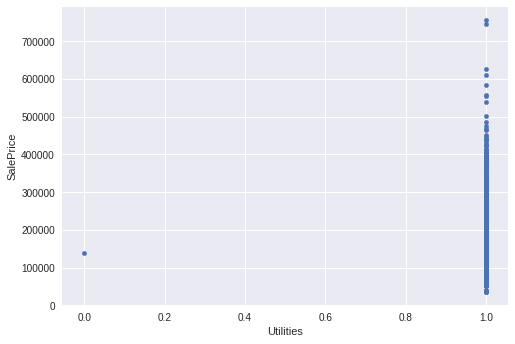

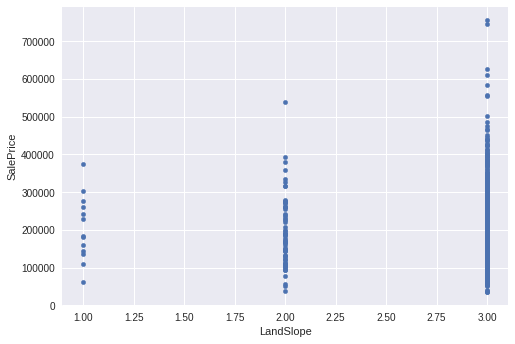

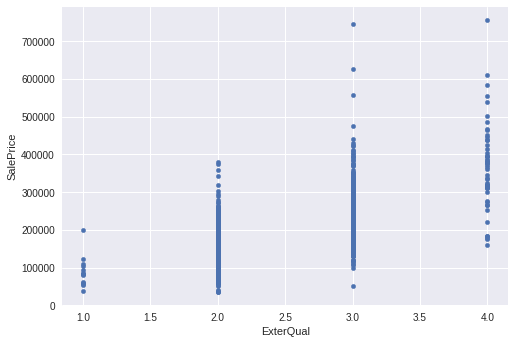

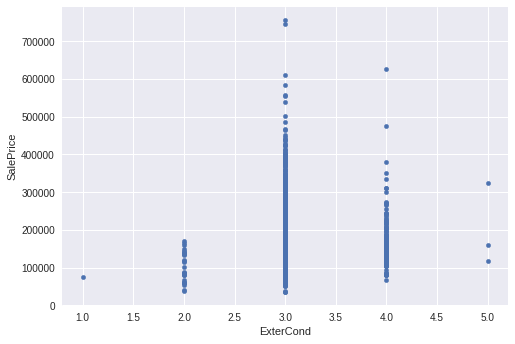

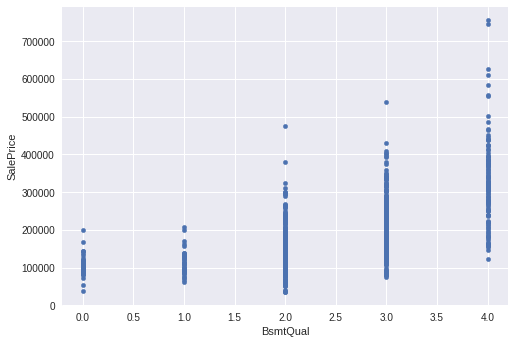

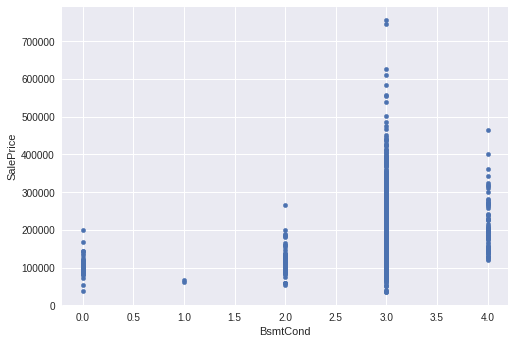

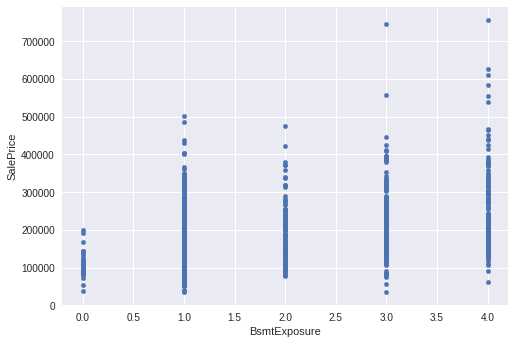

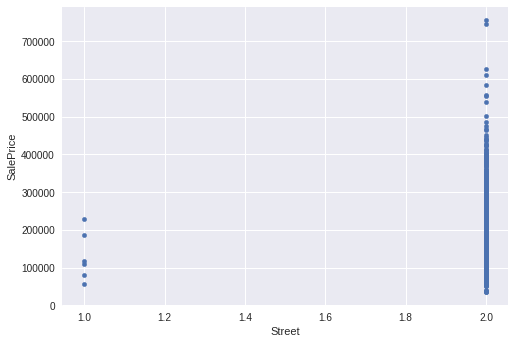

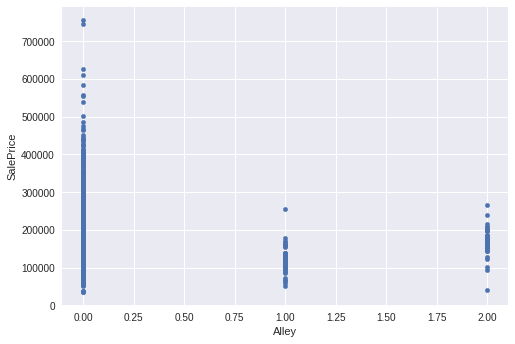

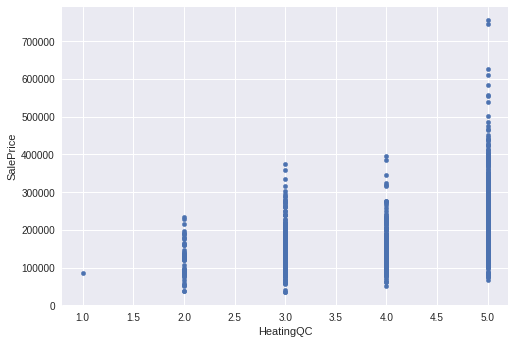

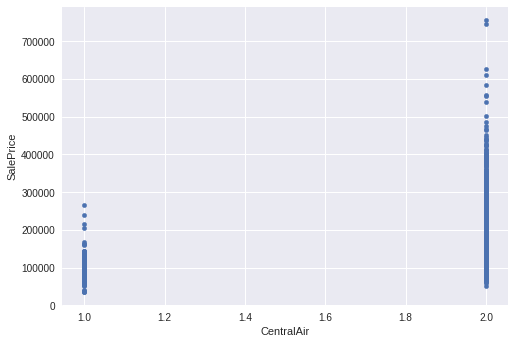

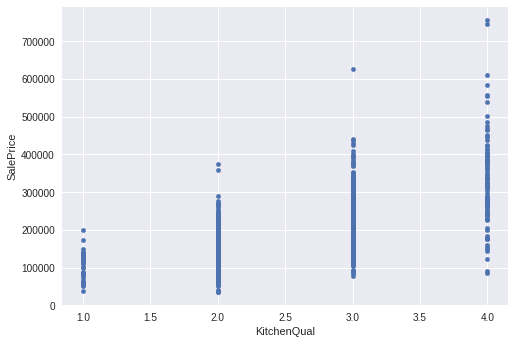

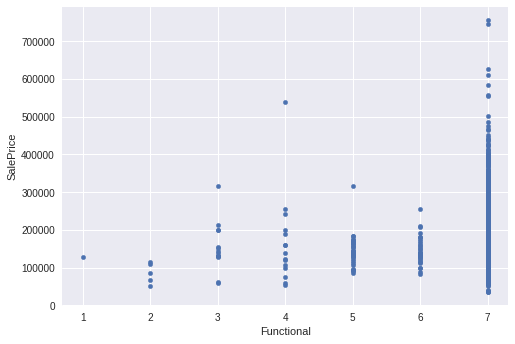

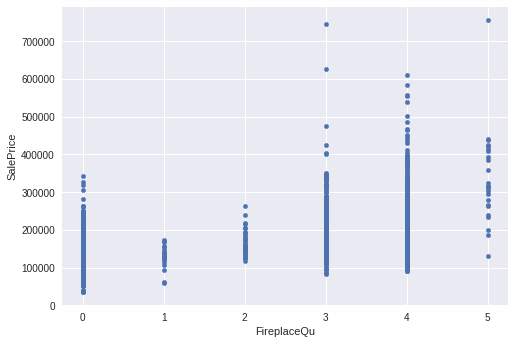

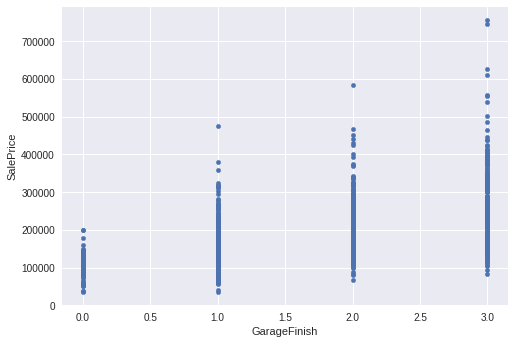

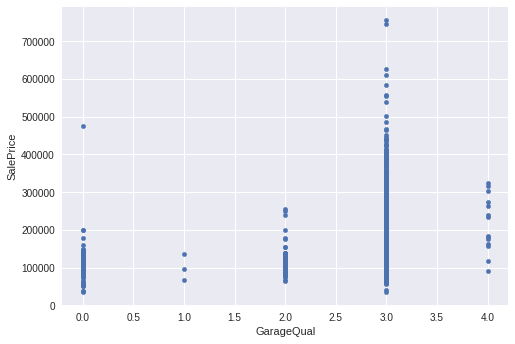

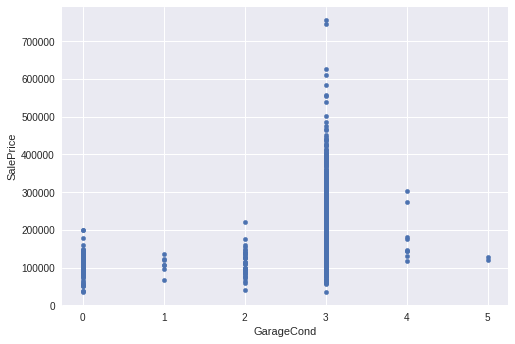

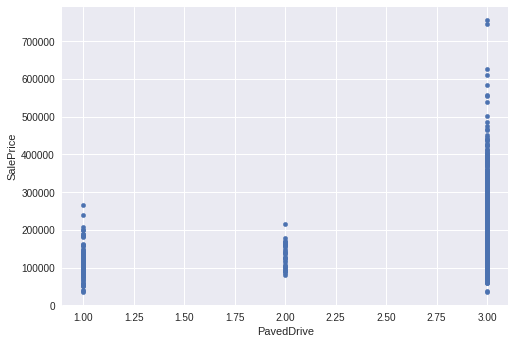

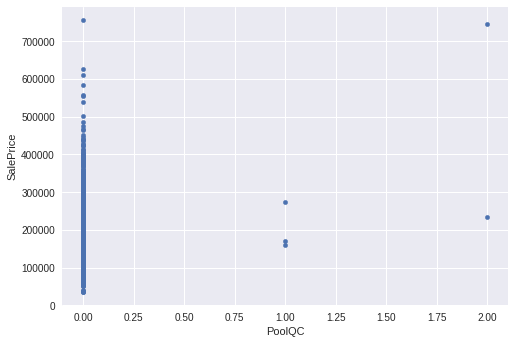

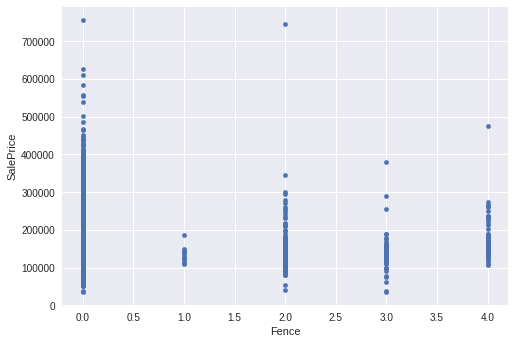

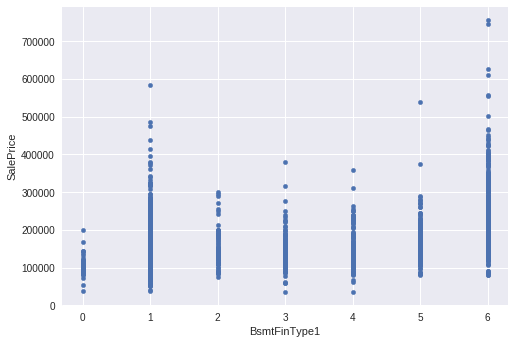

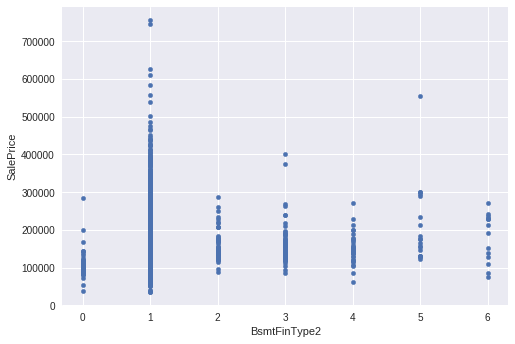

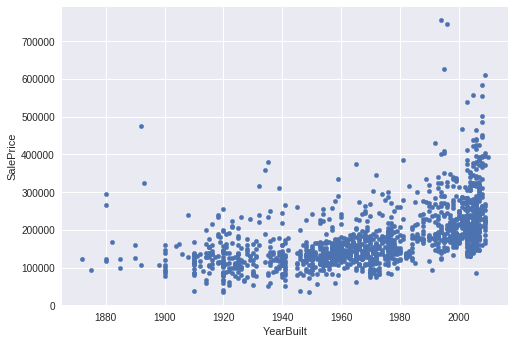

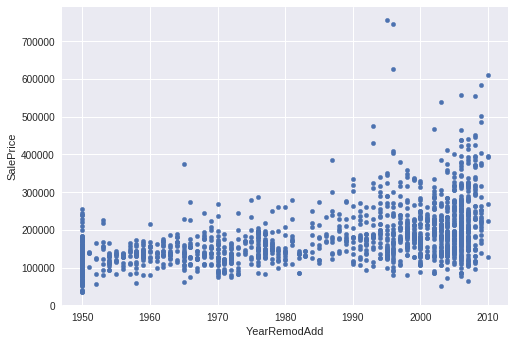

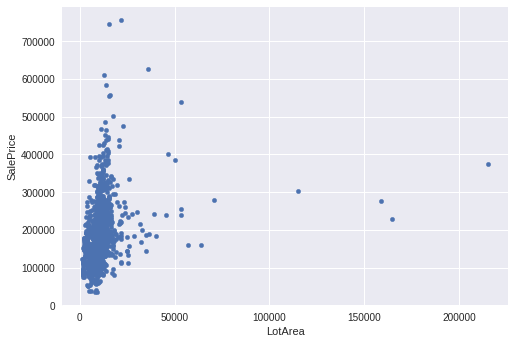

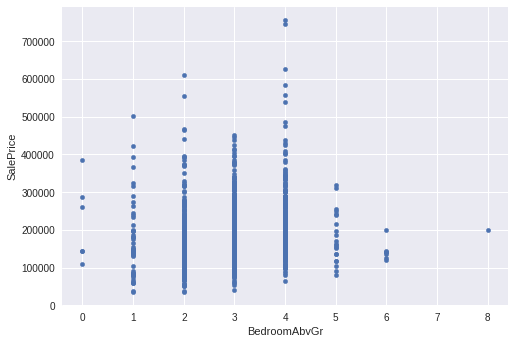

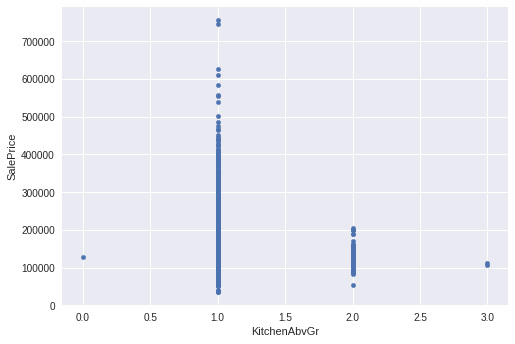

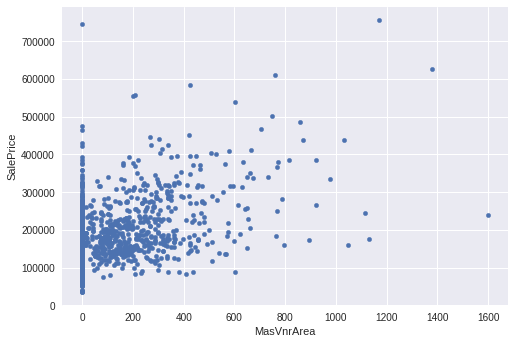

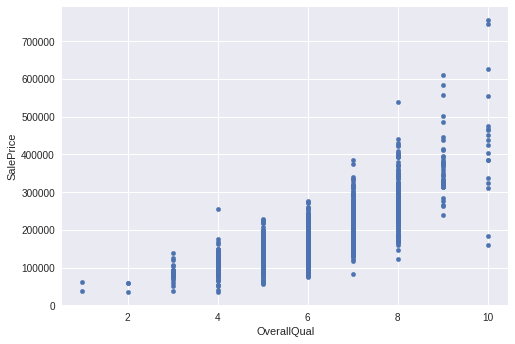

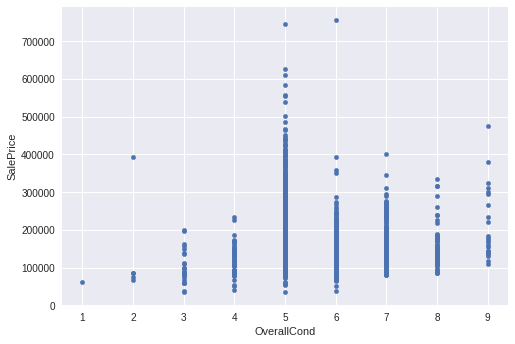

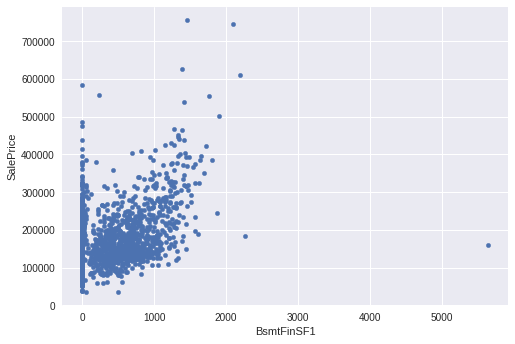

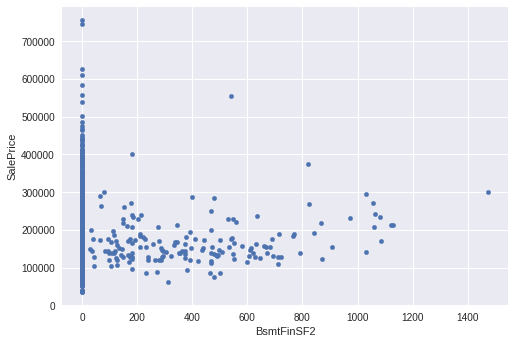

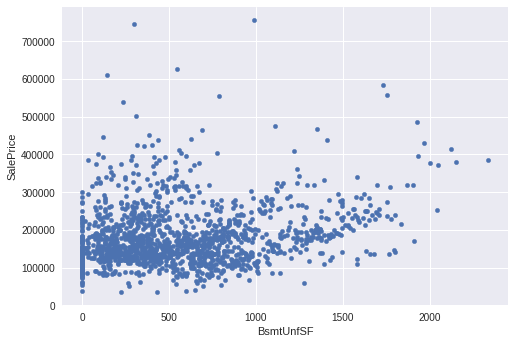

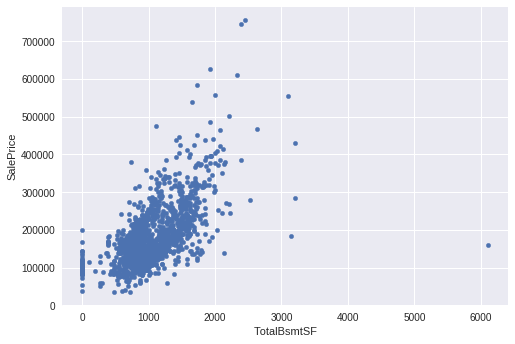

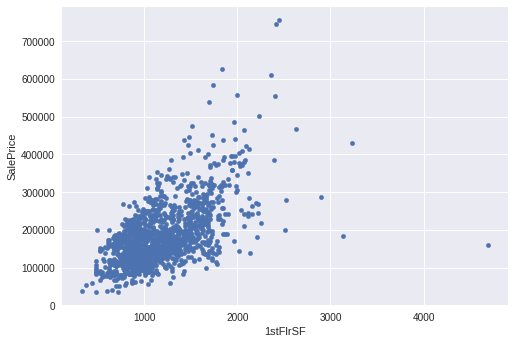

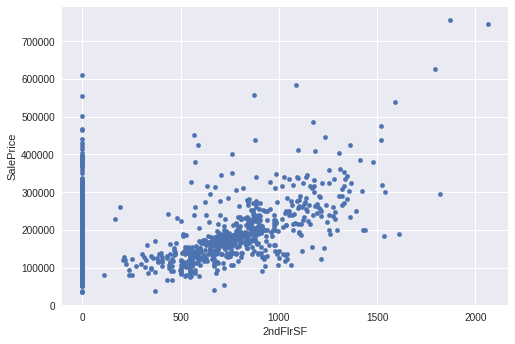

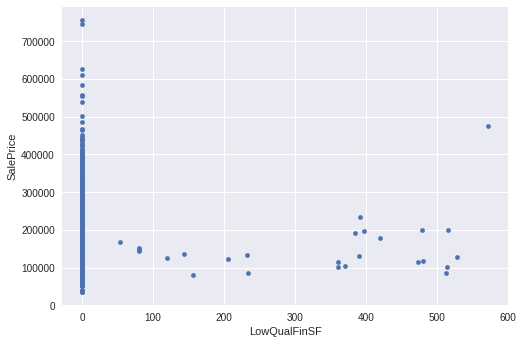

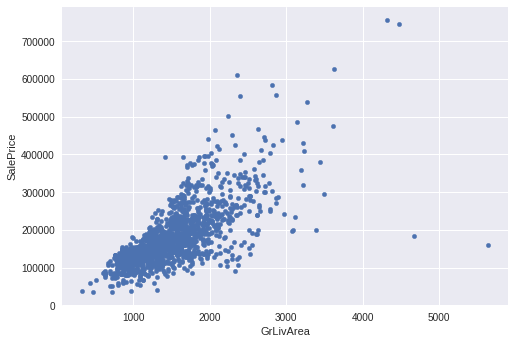

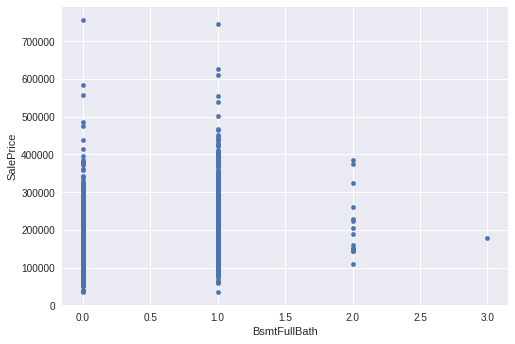

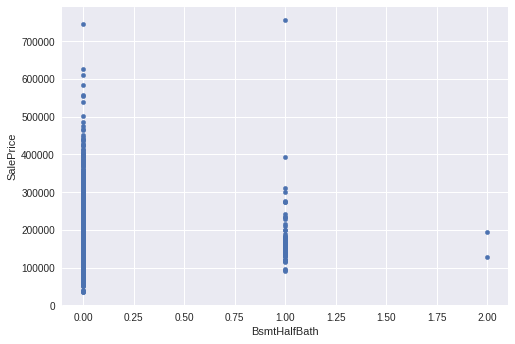

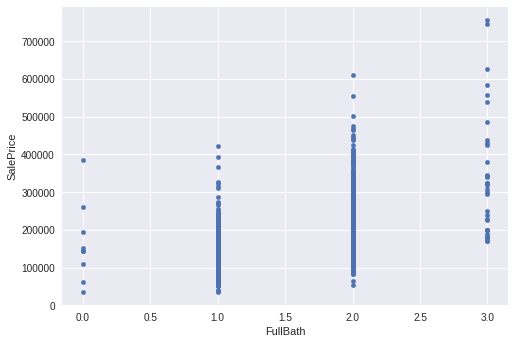

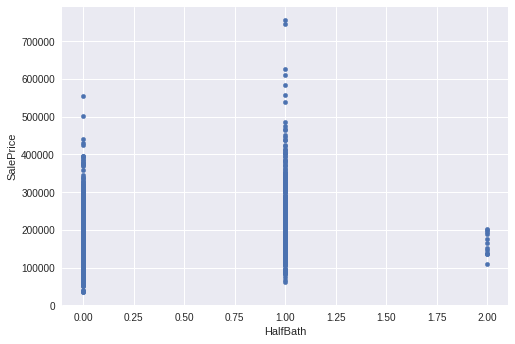

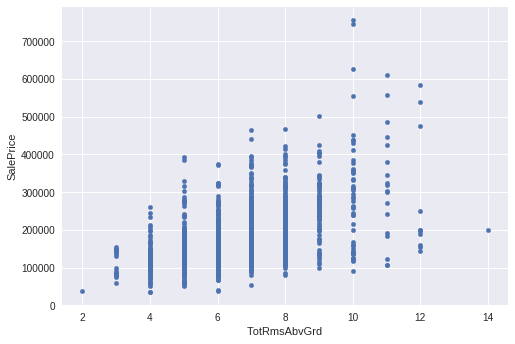

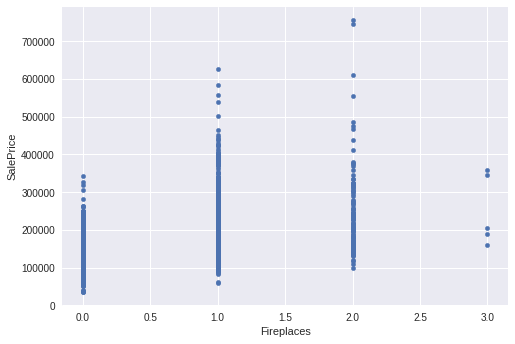

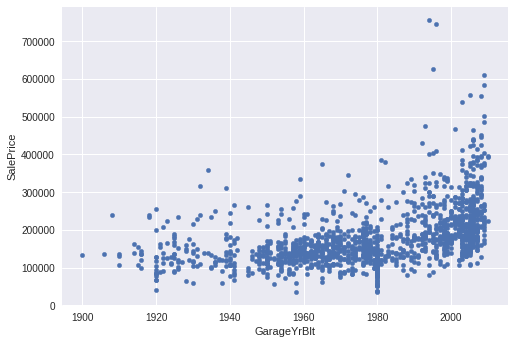

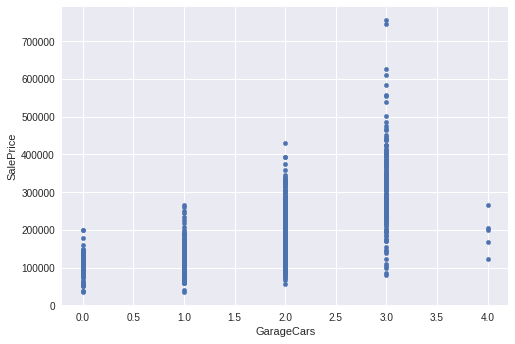

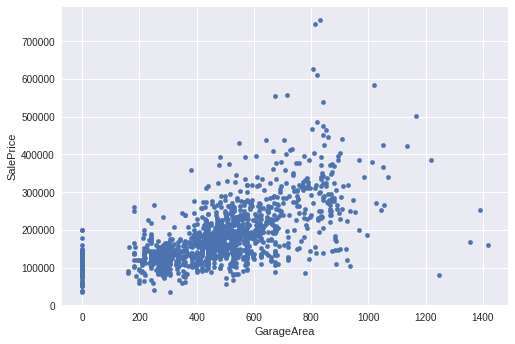

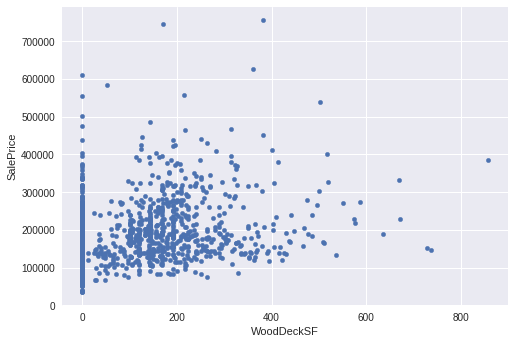

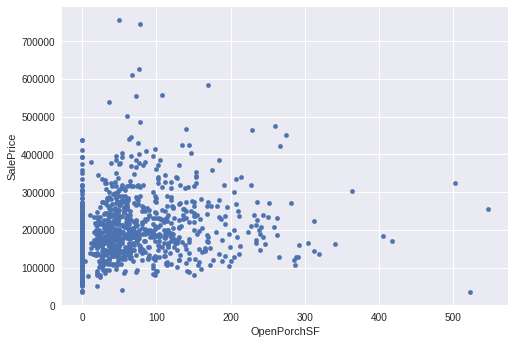

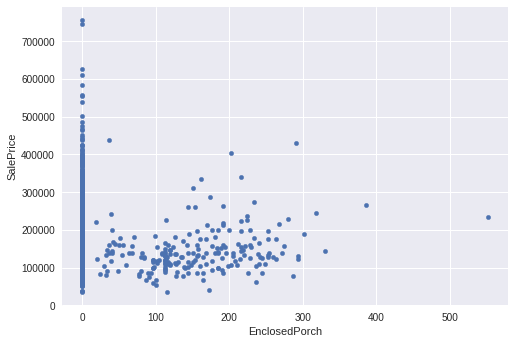

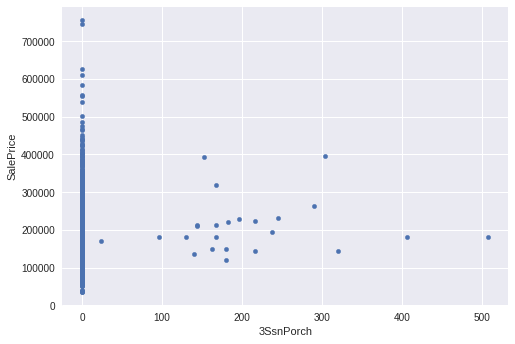

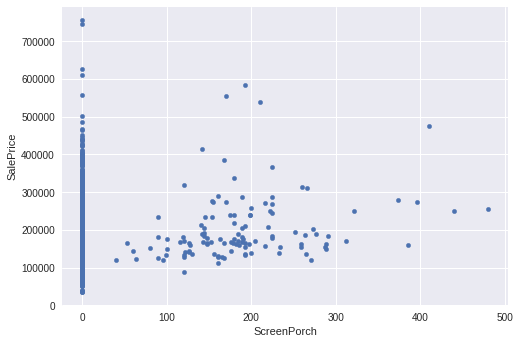

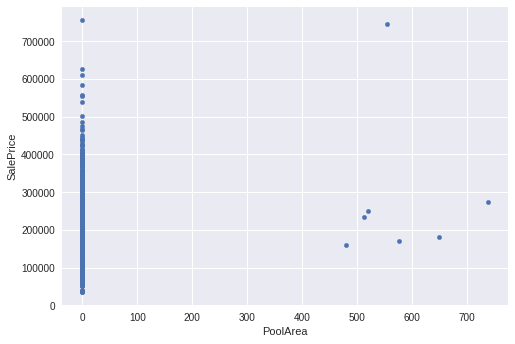

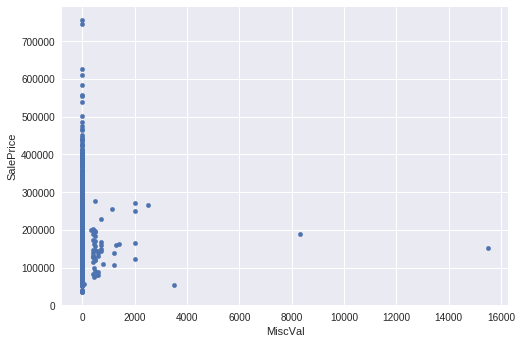

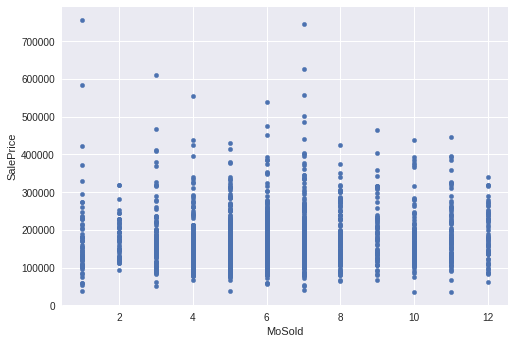

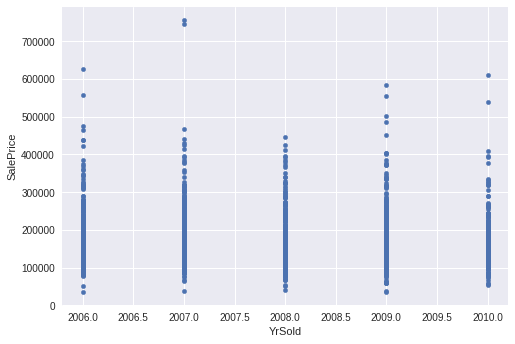

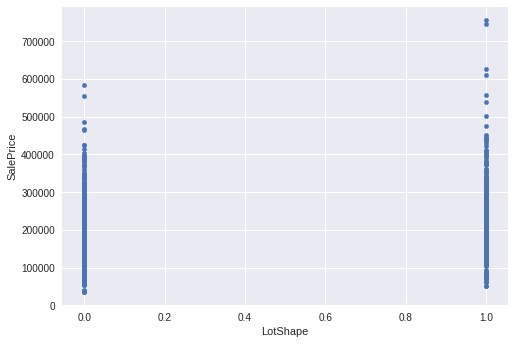

In [27]:

for c in columns+no_encoding:  
  if c in ["SalePrice","Exterior1st","Exterior2nd","Condition1", "Condition2","LotFrontage"]:
    continue
  N = 10
  train_df[c] = train_df[c].astype(float) 
  train_df.plot.scatter(x=c, y='SalePrice')


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


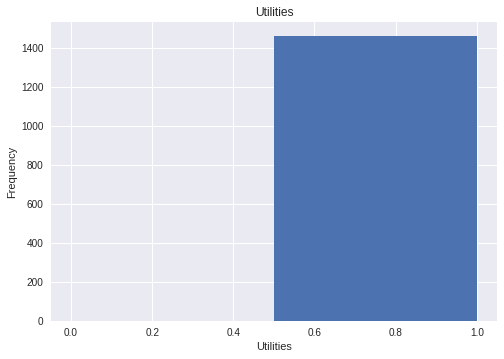

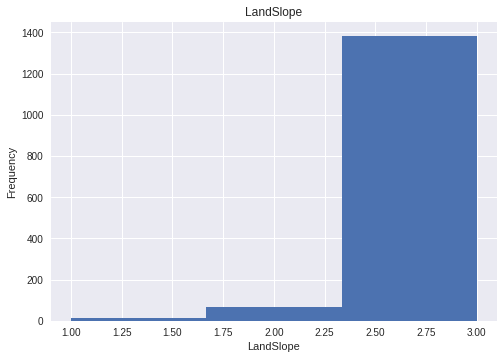

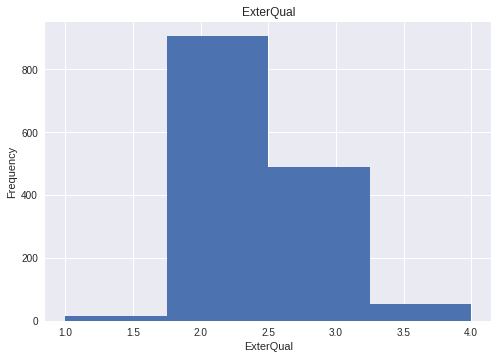

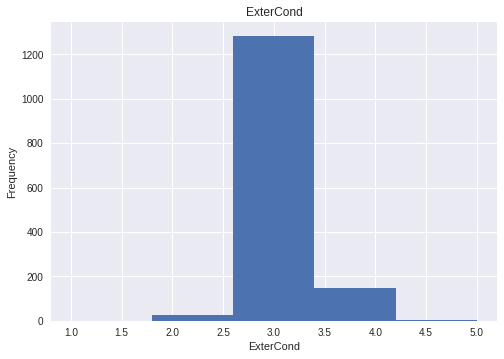

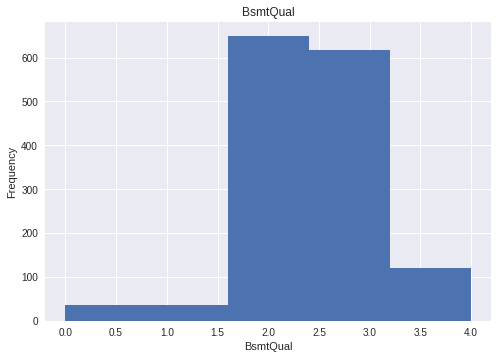

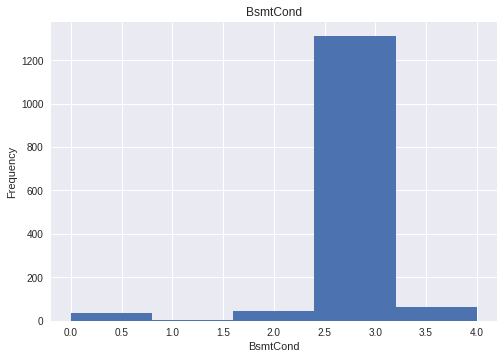

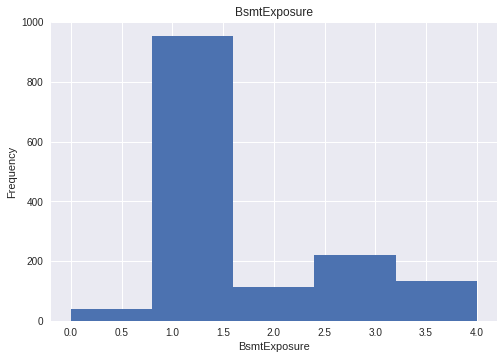

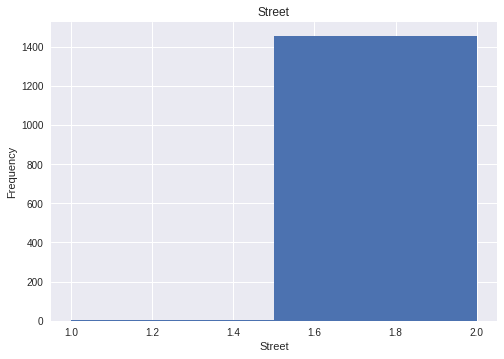

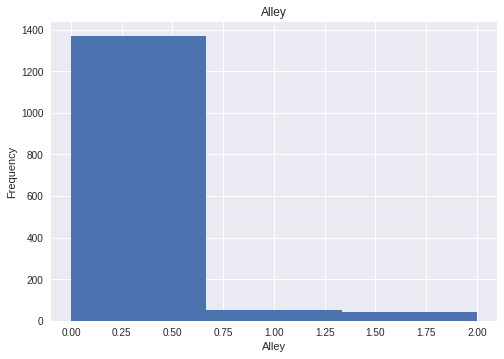

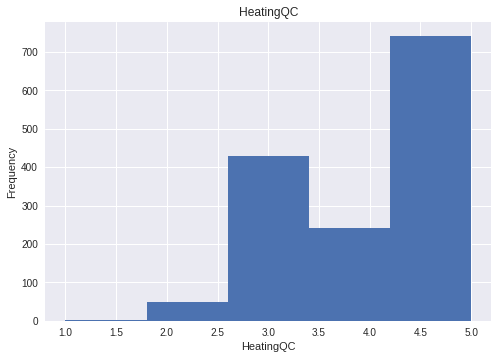

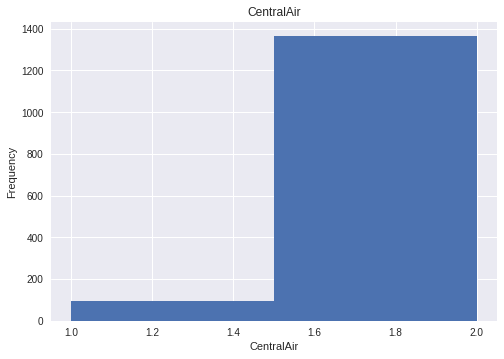

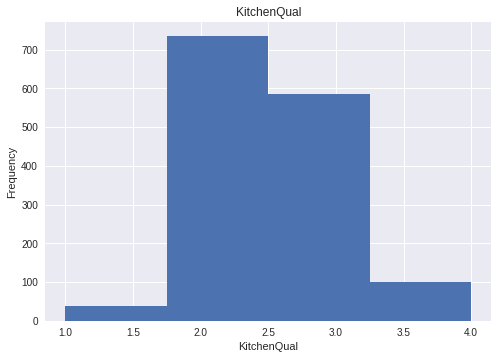

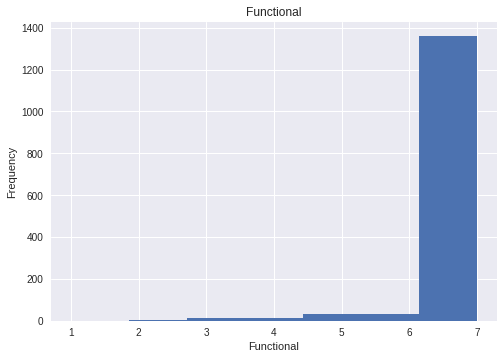

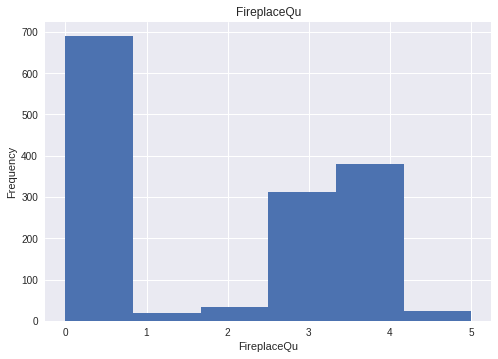

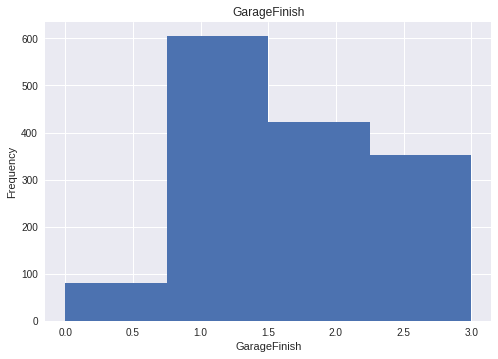

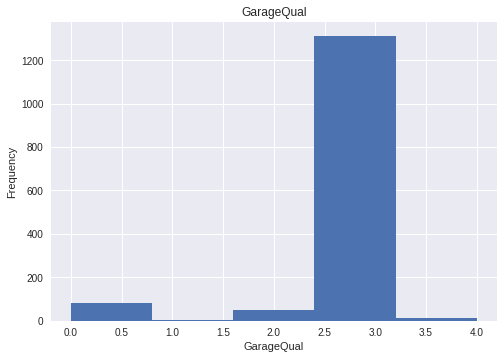

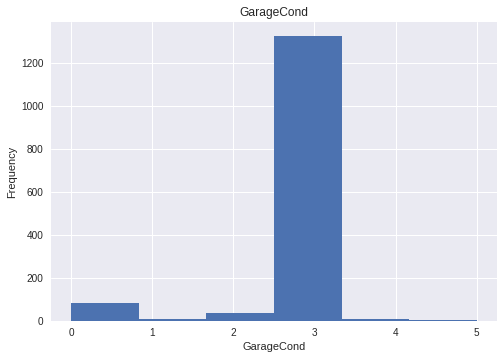

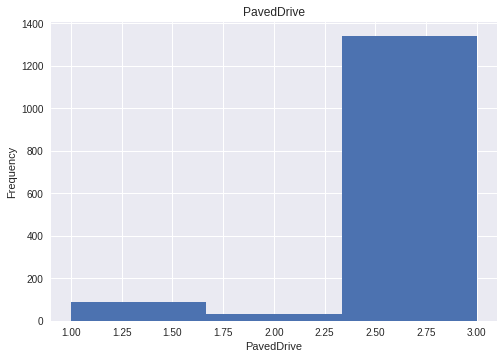

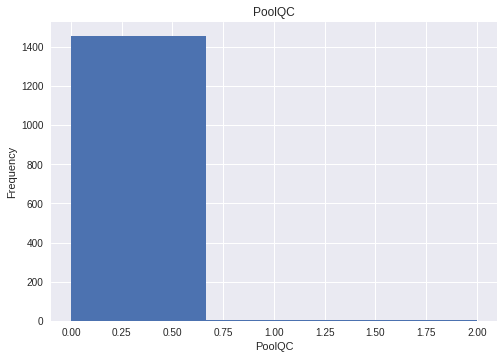

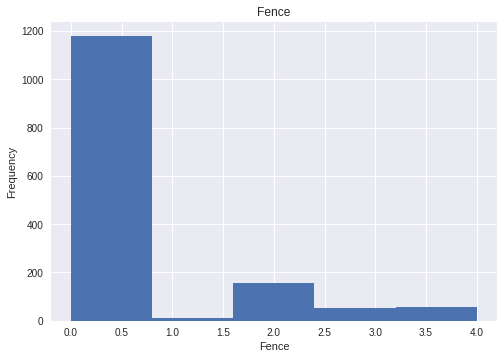

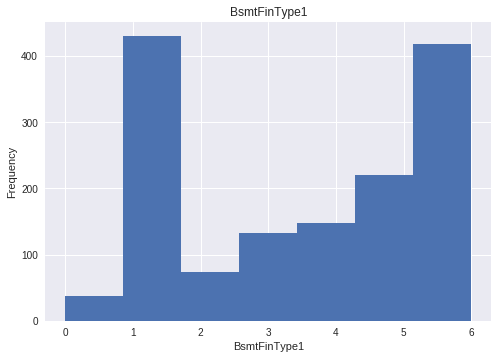

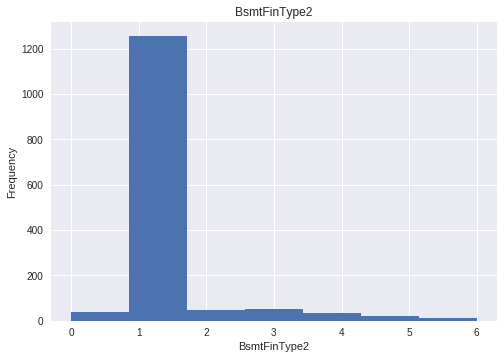

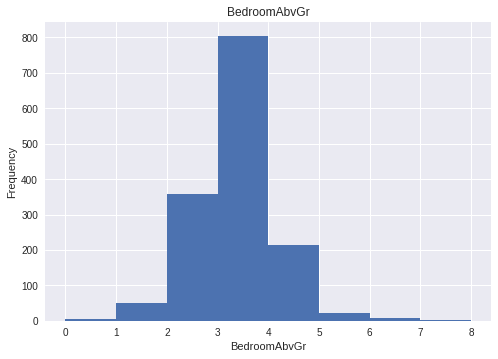

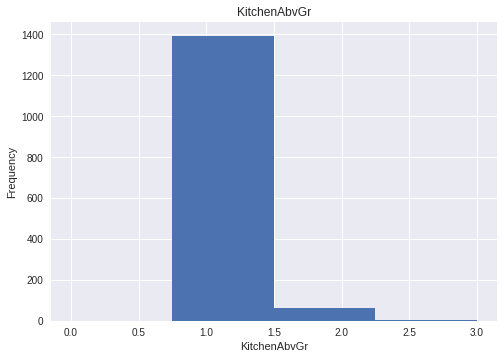

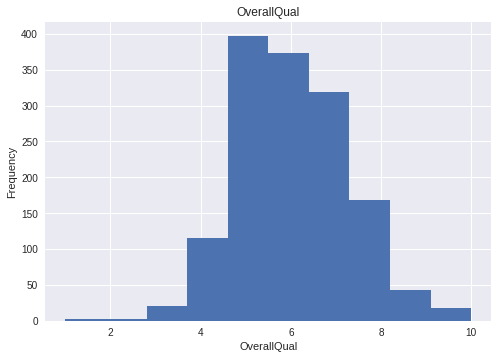

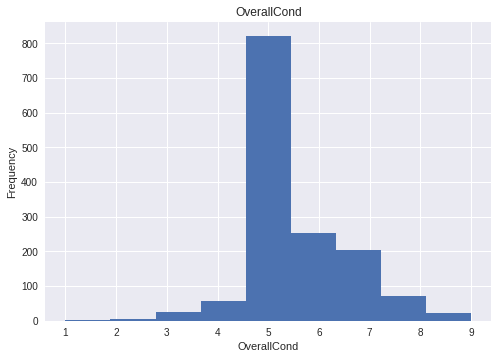

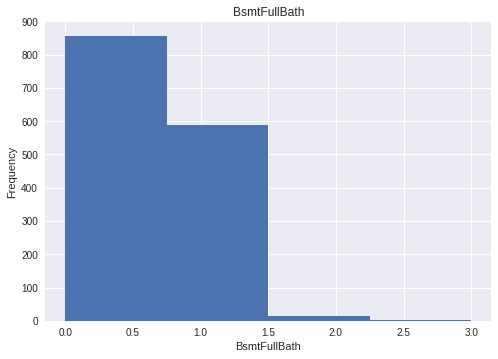

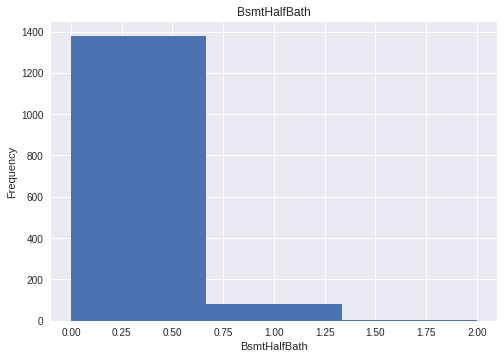

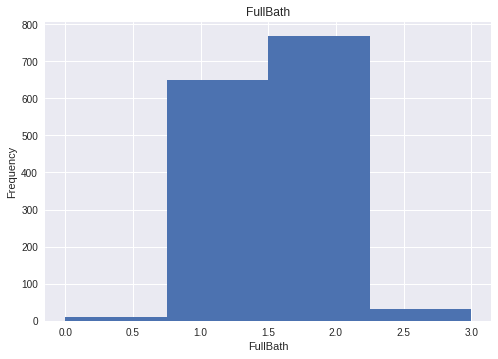

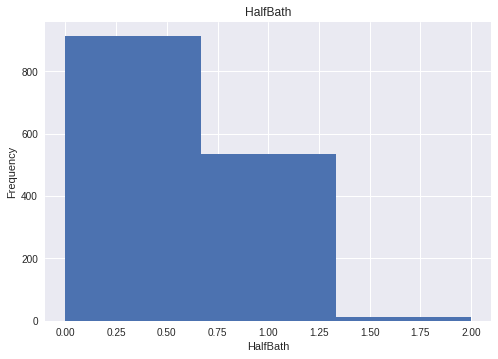

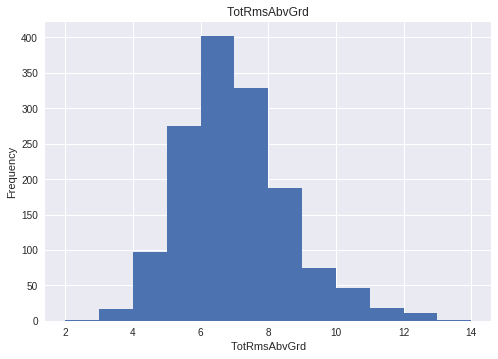

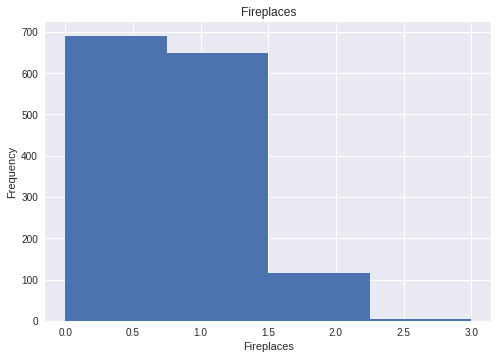

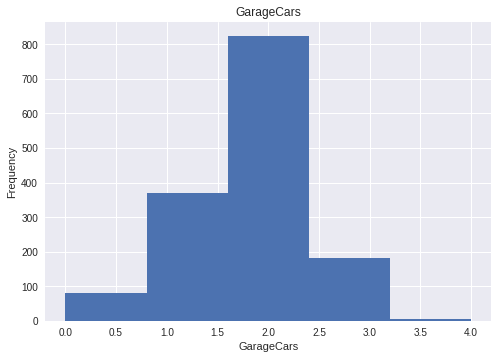

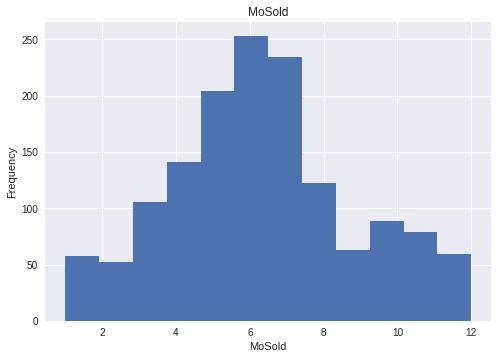

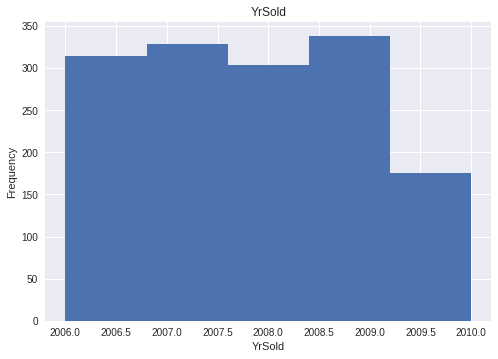

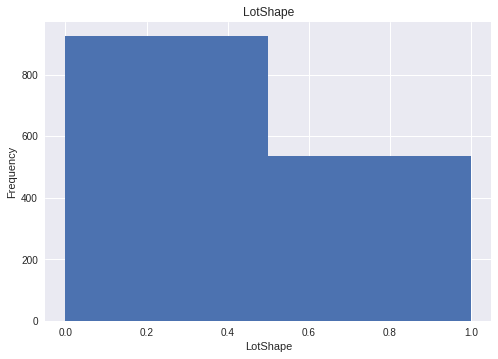

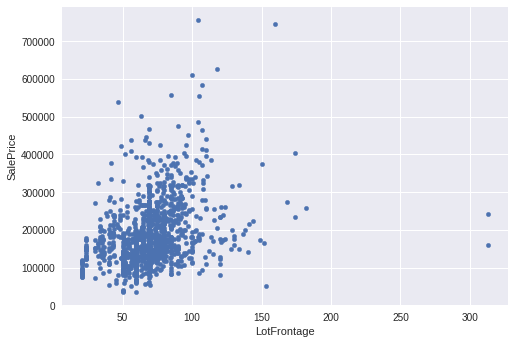

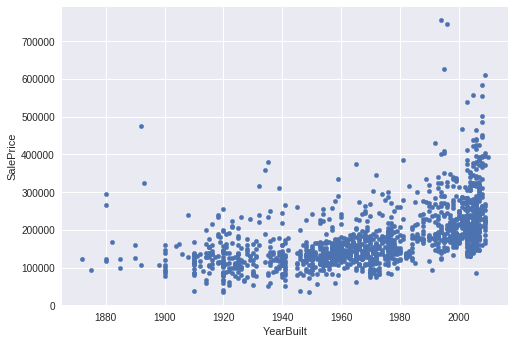

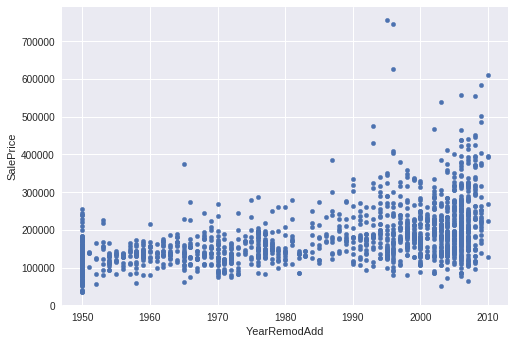

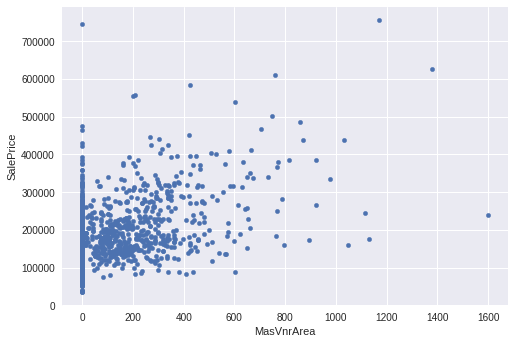

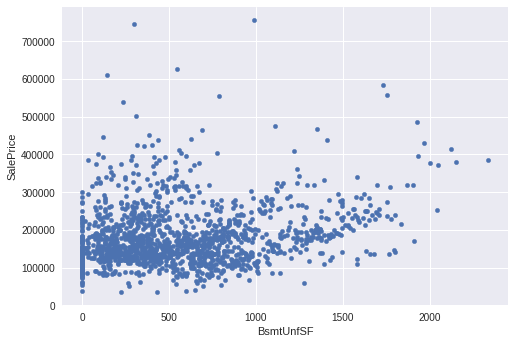

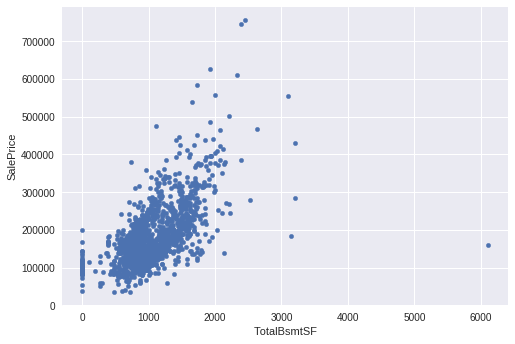

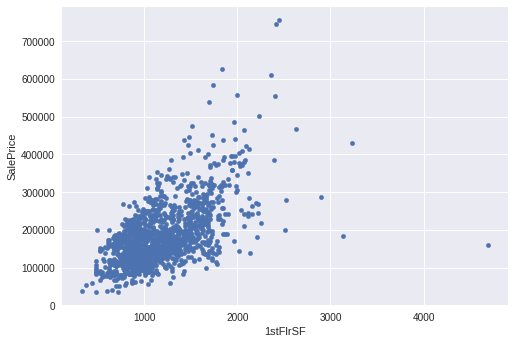

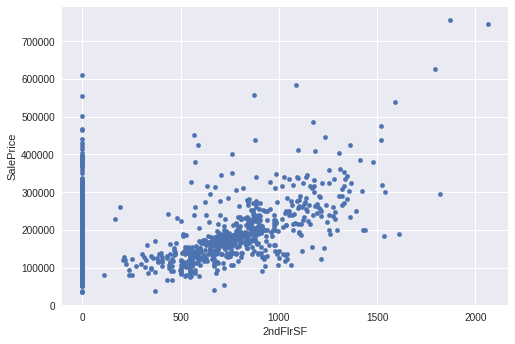

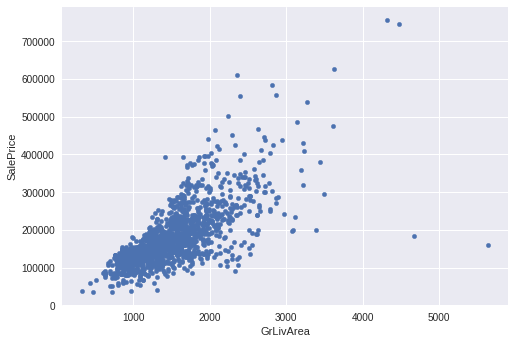

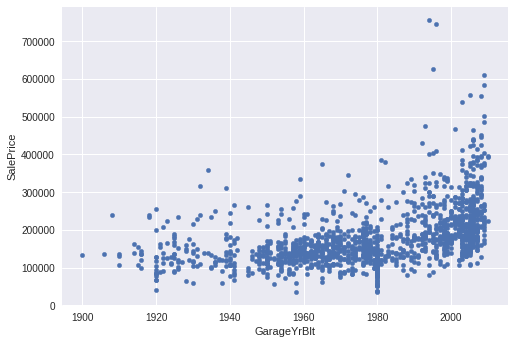

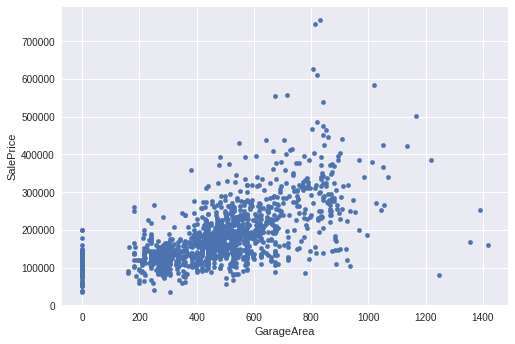

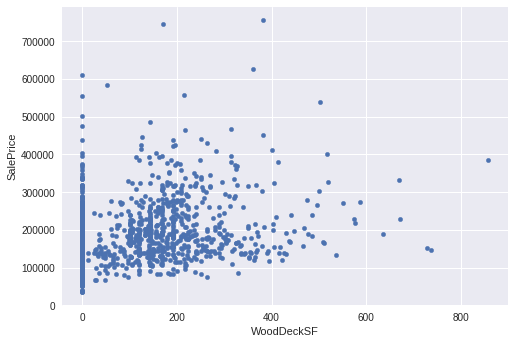

In [28]:
boxplot=["Utilities", 'LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','Street',
         'Alley','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish',
         'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','BsmtFinType1','BsmtFinType2','BedroomAbvGr','KitchenAbvGr','OverallQual',
         'OverallCond','BsmtFullBath',
         'BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars'
         ,'MoSold','YrSold','LotShape']
scatter = ["LotFrontage",'YearBuilt','YearRemodAdd', 'MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'GarageYrBlt', 'GarageArea','WoodDeckSF']
 
for column in boxplot:
  plt.figure()
  plt.title(column);plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.hist(train_df[column], bins=len(train_df[column].unique()))
  
for column in scatter:
  print(train_df.plot.scatter(x=column, y='SalePrice'))

## Linear correlation between the target variable and the features

In [0]:
correlations = np.absolute(train_df.corr()['SalePrice']).sort_values()

In [0]:
#change the value to decide how many features to keep
#if using xgbregressor it's always best to keep all the features for this problem
variables_to_keep=0

columnsTitles=[]
continuation= pd.DataFrame()
test_continuation=pd.DataFrame()
for item in list(correlations[-variables_to_keep:-1].keys()):
      if item in train_df and item in test_df:
                 columnsTitles.append(item)
                 
                 continuation[item] = train_df[item]
                 test_continuation[item]=test_df[item]
continuation['SalePrice']=train_df['SalePrice']


test_continuation = test_continuation.reindex(columns=columnsTitles)
columnsTitles.append('SalePrice')
continuation = continuation.reindex(columns=columnsTitles)

In [0]:
#cdict = {'red':  ((0.0, 0.0, 0.0),   # no red at 0
#                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
#                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

#        'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
#                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
#                  (1.0, 0.0, 0.0)),  # no green at 1

#        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
#                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
#                  (1.0, 0.0, 0.0))   # no blue at 1
#       }

#Create the colormap using the dictionary
#GnRd = colors.LinearSegmentedColormap('GnRd', cdict)

#to_show=50

#correlations1 = continuation.corr()

#Plot correlation matrix
#fig = plt.figure(figsize=(15,20))
#ax = fig.add_subplot(111)
#cax = ax.matshow(correlations1, interpolation='nearest', cmap=GnRd, vmin=-1, vmax=1 ,alpha=1, aspect='auto' )
#fig.colorbar(cax)
#ticks = np.arange(0,len(continuation.columns),1)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_xticklabels(list(continuation.keys()),rotation='vertical')
#ax.set_yticklabels(list(continuation.keys()))
#plt.show()

# Predictions

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import ensemble

from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.feature_selection import RFE

## Add columns based on the histograms and boxplots before

In [0]:
new_c=continuation.copy()
new_c=new_c.drop('SalePrice',1)

In [0]:

new_c['YearBuilt2']=new_c['YearBuilt']**2
new_c['YearRemodAdd2']=new_c['YearRemodAdd']**2
new_c['GrLivArea2']=new_c['GrLivArea']**2
#new_c['LotArea']=np.log(new_c['LotArea'])
new_c['OverallQual2']=new_c['OverallQual']**2
new_c['1stFlrSF2']=new_c['1stFlrSF']**2
new_c['2ndFlrSF2']=new_c['2ndFlrSF']**2
new_c['GarageYrBlt2']=new_c['GarageYrBlt']**2
new_c['TotRmsAbvGrd2']=new_c['TotRmsAbvGrd']**2
new_c['GarageCars2']=new_c['GarageCars']**2
new_c['LandSlope2']=new_c['LandSlope']**2
new_c['ExterCond2']=new_c['ExterCond']**2
new_c['ExterQual2']=new_c['ExterQual']**2

new_c['BsmtQual2']=new_c['BsmtQual']**2
new_c['BsmtCond2']=new_c['BsmtCond']**2
new_c['BsmtExposure2']=new_c['BsmtExposure']**2
new_c['Alley2']=new_c['Alley']**2
new_c['KitchenQual2']=new_c['KitchenQual']**2
new_c['FireplaceQu2']=new_c['FireplaceQu']**2
new_c['GarageArea2']=new_c['GarageArea']**2
new_c['GarageQual2']=new_c['GarageQual']**2

new_c['GarageFinish2']=new_c['GarageFinish']**2

new_c['GarageCond2']=new_c['GarageCond']**2
new_c['PavedDrive2']=new_c['PavedDrive']**2
new_c['PoolQC2']=new_c['PoolQC']**2
new_c['Fence2']=new_c['Fence']**2
new_c['HeatingQC2']=new_c['HeatingQC']**2

new_c['FullBath2']=new_c['FullBath']**2
new_c['TotRmsAbvGrd2']=new_c['TotRmsAbvGrd']**2
new_c['GarageYrBlt2']=new_c['GarageYrBlt']**2
new_c['PavedDrive2']=new_c['PavedDrive']**2



## Ordinary Ridge or linear regression
Here I also do RFE and I add some new columns that are equal to the squared values of other existing columns

In [0]:
#total_removed=[]
#toremove=[]
#toremove.append('SalePrice')


######Use Ridge instead of LinearRegression if you want

#while(len(toremove)>0):
#  new_c=new_c.drop(toremove,1)
#  scores =cross_val_score(linear_model.LinearRegression(),new_c, continuation['SalePrice'], cv=10,scoring='neg_mean_squared_error').mean()
#  toremove=[]
#  print ("Cross-validated scores so far:", scores.mean())
#  for i in range(0, new_c.shape[1]):
#     scores_new = cross_val_score(linear_model.LinearRegression(), new_c.drop(new_c.columns[i],1), continuation['SalePrice'],cv=10,scoring='neg_mean_squared_error').mean() 
#     if(scores_new > scores):
#        toremove=[new_c.columns[i]]
#        scores=scores_new
#  print ("Cross-validated scores without: ",toremove, scores)
        
#  total_removed.append(toremove)

In [0]:
#print(total_removed)

#toremove=[]
#for t in total_removed:
#  for j in t:
#    toremove.append(j)
#print(toremove)
#print(len(toremove))

## PCA. Automatic feature combination and decide how many of the top i eigenvectors to keep. 

## We found that another way to to feature selection is to perform dimensionality reduction.
Before running that I recommend you do standardscaling to the columns because PCA is affected by value scales

In [0]:
#from sklearn import decomposition
#best_i=1;
#best_score=-np.inf
#scores = cross_val_score(linear_model.Ridge(), new_c, continuation['SalePrice'], cv=10,scoring='neg_mean_squared_error')
#print ("Cross-validated scores:", scores.mean())
#for i in range(1,55):
#  pca = decomposition.PCA(n_components=i)
#  new_c_1=pca.fit_transform(new_c)
#  scores = cross_val_score(linear_model.Ridge(), new_c_1, continuation['SalePrice'], cv=10,scoring='neg_mean_squared_error')#scoring='RMSE')
#  print ("Cross-validated scores:", scores.mean())
#  if(scores.mean()>best_score):
#    best_i=i
#    best_score=scores.mean()
#print(best_i, best_score)

In [0]:
#print(best_i, best_score)

# Actual predictions


In [0]:

test_continuation['YearBuilt2']=test_continuation['YearBuilt']**2
test_continuation['YearRemodAdd2']=test_continuation['YearRemodAdd']**2
test_continuation['GrLivArea2']=test_continuation['GrLivArea']**2
#test_continuation['LotArea']=np.log(test_continuation['LotArea'])
test_continuation['OverallQual2']=test_continuation['OverallQual']**2
test_continuation['1stFlrSF2']=test_continuation['1stFlrSF']**2
test_continuation['2ndFlrSF2']=test_continuation['2ndFlrSF']**2
test_continuation['GarageYrBlt2']=test_continuation['GarageYrBlt']**2
test_continuation['TotRmsAbvGrd2']=test_continuation['TotRmsAbvGrd']**2
test_continuation['GarageCars2']=test_continuation['GarageCars']**2
test_continuation['LandSlope2']=test_continuation['LandSlope']**2
test_continuation['ExterCond2']=test_continuation['ExterCond']**2
test_continuation['ExterQual2']=test_continuation['ExterQual']**2

test_continuation['BsmtQual2']=test_continuation['BsmtQual']**2
test_continuation['BsmtCond2']=test_continuation['BsmtCond']**2
test_continuation['BsmtExposure2']=test_continuation['BsmtExposure']**2
test_continuation['Alley2']=test_continuation['Alley']**2
test_continuation['KitchenQual2']=test_continuation['KitchenQual']**2
test_continuation['FireplaceQu2']=test_continuation['FireplaceQu']**2
test_continuation['GarageArea2']=test_continuation['GarageArea']**2
test_continuation['GarageQual2']=test_continuation['GarageQual']**2

test_continuation['GarageFinish2']=test_continuation['GarageFinish']**2



test_continuation['GarageCond2']=test_continuation['GarageCond']**2
test_continuation['PavedDrive2']=test_continuation['PavedDrive']**2
test_continuation['PoolQC2']=test_continuation['PoolQC']**2
test_continuation['Fence2']=test_continuation['Fence']**2
test_continuation['HeatingQC2']=test_continuation['HeatingQC']**2

test_continuation['FullBath2']=test_continuation['FullBath']**2
test_continuation['TotRmsAbvGrd2']=test_continuation['TotRmsAbvGrd']**2
test_continuation['GarageYrBlt2']=test_continuation['GarageYrBlt']**2
test_continuation['PavedDrive2']=test_continuation['PavedDrive']**2



In [0]:
#If you want to do linear regression or ridge regression

#regr = linear_model.Ridge()
#regr.fit(new_c, continuation['SalePrice'])

#d=test_continuation
#d=test_continuation.drop(columns=toremove)
#res = regr.predict(d)





In [0]:
#If you want to do PCA then regression

#pca = decomposition.PCA(n_components=best_i)
#new_c_1=pca.fit_transform(new_c)
#regr = linear_model.Ridge(
#regr.fit(new_c_1,continuation['SalePrice'])
#res = regr.predict(pca.transform(test_continuation))

## GridSearch over XGBregressor parameters

In [41]:
xgb1 = XGBRegressor()
parameters = { #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.04], #so called `eta` value
              'max_depth': [4],
              'min_child_weight': [3],
              'silent': [1],
              'subsample': [0.6],
              'colsample_bytree': [0.7],
              'n_estimators': [1050,1100]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        #scoring='neg_mean_squared_error',
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)


xgb_grid.fit(new_c,continuation['SalePrice'])


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'objective': ['reg:linear'], 'learning_rate': [0.04], 'max_depth': [4], 'min_child_weight': [3], 'silent': [1], 'subsample': [0.6], 'colsample_bytree': [0.7], 'n_estimators': [1050, 1100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [42]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.89394344466005
{'colsample_bytree': 0.7, 'learning_rate': 0.04, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 1050, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.6}


## GridSearch over the BaggingRegressor that uses XGBRegressor (takes a while)

In [0]:
#base_estimator=XGBRegressor(nthread=1,objective='reg:linear',learning_rate=0.06,max_depth=4,min_child_weight=3,n_estimators=750,subsample=0.6,colsample_bytree=0.7)

#parameters = {'n_estimators':[8,10,12], 
#              'max_samples':[1.0],
#              'max_features': [1.0], 
#              'bootstrap': [True,False],
#              'bootstrap_features': [False,True],
#              'random_state': [123],
#              'base_estimator':[base_estimator]
#             }


#bg=ensemble.BaggingRegressor()
#xgb_grid = GridSearchCV(bg,
#                        parameters,
#                        #scoring='neg_mean_squared_error',
#                        cv = 5,
#                        n_jobs = 5,
#                        verbose=True)
#xgb_grid.fit(new_c,continuation['SalePrice'])

In [0]:
#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

## XGBRegressor and BaggingRegressor with best parameters

In [0]:
def new_reg():
  regr=ensemble.BaggingRegressor(base_estimator=XGBRegressor(nthread=1,objective='reg:linear',
                                                                        learning_rate=0.06,max_depth=4,
                                                                        min_child_weight=3,n_estimators=750,subsample=0.6,colsample_bytree=0.7),
                                        n_estimators=12, max_samples=1.0,
                                        max_features=1.0, bootstrap=False, bootstrap_features=True,
                                        oob_score=False, warm_start=False, n_jobs=5, random_state=123,
                                        verbose=1)
  return regr

In [46]:
regr=new_reg()

d=test_continuation.copy()
#d=test_continuation.drop(columns=toremove)


regr.fit(new_c,continuation['SalePrice'])
res = regr.predict(d)


#print(scores)



[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   57.4s remaining:  1.4min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.5s finished


In [0]:

##########Use this instead of the previous cell if you want standardization

#d=test_continuation.copy()

#alone=['SalePrice','Exterior1st','Exterior2nd','Condition1','Condition2']
    
#to_standardize=columns + no_encoding

#for a in alone:
#  to_standardize.remove(a)

#scaled_features = new_c.copy()


#features = scaled_features[to_standardize]
#scaler = StandardScaler().fit(features.values)
#features = scaler.transform(features.values)
#scaled_features[to_standardize] = features
#print(scaled_features.shape)
#features_d=d[to_standardize]
#features_d=scaler.transform(features_d.values)
#d[to_standardize]   =features_d 

#print("Fitting")

#regr=new_reg()

#regr.fit(scaled_features,continuation['SalePrice'])

#res = regr.predict(d)


## Download results

In [47]:
  res

array([126611.31, 156818.86, 189082.69, ..., 166546.58, 113973.34,
       210215.67], dtype=float32)

In [0]:
n_points = res.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = np.arange(1461,1461+n_points,1)
y_pred_pp[:, 1] = res #you migh want to replace values with reverse_encoding or vice versa
np.savetxt('dontforgettosubmitthis.csv', y_pred_pp, fmt='%d', delimiter=',',header="Id,SalePrice",comments='')

In [0]:

files.download('dontforgettosubmitthis.csv') 